## Ordinary Kriging with my own data

In [27]:
%matplotlib inline
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [14]:
def generate_data_matrix(spatial_size, temporal_size, miss_ratio=0):
    data_matrix = np.random.randint(1,5,size=(spatial_size,temporal_size))
    origin = data_matrix.copy()
    k = round(spatial_size*temporal_size*miss_ratio)
    ri = np.random.choice(spatial_size*temporal_size,k,replace=False)
    data_matrix.flat[ri] = 0
    return origin,data_matrix

In [23]:
origin,dm = generate_data_matrix(5,3,0.3)

In [25]:
dm

array([[3, 0, 0],
       [1, 0, 4],
       [2, 2, 3],
       [2, 2, 1],
       [0, 4, 1]])

## Oridianry Kriging

In [1]:
import pykrige.kriging_tools as kt
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

data = np.array([[0.3, 1.2, 0.47],
                 [1.9, 0.6, 0.56],
                 [1.1, 3.2, 0.74],
                 [3.3, 4.4, 1.47],
                 [4.7, 3.8, 1.74]])

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                     verbose=False, enable_plotting=False)

# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See OrdinaryKriging.__doc__ for more information.)
z, ss = OK.execute('grid', gridx, gridy)

# Writes the kriged grid to an ASCII grid file.
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")

In [5]:
print(z.shape)

(11, 11)


In [10]:
print(gridx.shape,gridy.shape)

(11,) (11,)


In [6]:
print(ss.shape)

(11, 11)


## Geometic example

In [4]:
from pykrige.ok import OrdinaryKriging
import numpy as np

# Make this example reproducible:
np.random.seed(89239413)

# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

# Print data at equator (last longitude index will show periodicity):
print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

# ====================================OUTPUT==================================
# >>> Original data:
# >>> Longitude: [122 166  92 138  86 122 136]
# >>> Latitude:  [-46 -36 -25 -73 -25  50 -29]
# >>> z:         [ 2.75  3.36  2.24  3.07  3.37  5.25  2.82]
# >>>
# >>> Krige at 60° latitude:
# >>> ======================
# >>> Longitude: [   0.   60.  120.  180.  240.  300.  360.]
# >>> Value:     [ 5.32  5.14  5.3   5.18  5.35  5.61  5.32]
# >>> Sigma²:    [ 2.19  1.31  0.41  1.22  2.1   2.46  2.19]
# >>>
# >>> Ignoring curvature:
# >>> =====================
# >>> Value:     [ 4.55  4.72  5.25  4.82  4.61  4.53  4.48]
# >>> Sigma²:    [ 3.77  1.99  0.39  1.84  3.52  5.43  7.5 ]
#
# We can see that the data point at longitude 122, latitude 50 correctly
# dominates the kriged results, since it is the closest node in spherical
# distance metric, as longitude differences scale with cos(latitude).
# When kriging using longitude / latitude linearly, the value for grid points
# with longitude values further away as longitude is now incorrectly
# weighted equally as latitude.

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


## Regression Kriging

In [11]:
import sys

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

from pykrige.rk import RegressionKriging
from pykrige.compat import train_test_split

svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]

try:
    housing = fetch_california_housing()
except PermissionError:
    # this dataset can occasionally fail to download on Windows
    sys.exit(0)

# take the first 5000 as Kriging is memory intensive
p = housing["data"][:5000, :-2]
x = housing["data"][:5000, -2:]
target = housing["target"][:5000]

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(
    p, x, target, test_size=0.3, random_state=42
)

for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train)
    print("Regression Score: ", m_rk.regression_model.score(p_test, target_test))
    print("RK score: ", m_rk.score(p_test, x_test, target_test))

# ====================================OUTPUT==================================

# ========================================
#  regression model: <class 'sklearn.svm.classes.SVR'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  -0.034053855457
# RK score:  0.66195576665
# ========================================
#  regression model: <class 'sklearn.ensemble.forest.RandomForestRegressor'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  0.699771164651
# RK score:  0.737574040386
# ========================================
#  regression model: <class 'sklearn.linear_model.base.LinearRegression'>
# Finished learning regression model
# Finished kriging residuals
# Regression Score:  0.527796839838
# RK score:  0.604908933617

regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.03405385545698292
RK score:  0.6619557666501965
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  0.6985847236560291
RK score:  0.7348962294380064
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  0.5277968398381673
RK score:  0.6049089336167253


## 1-d Kriging

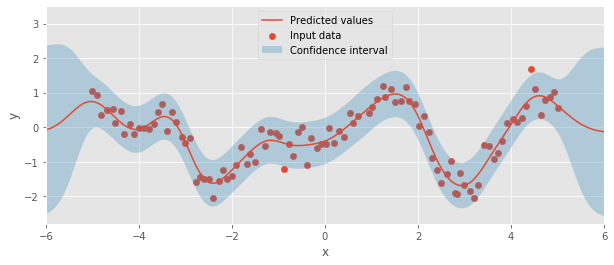

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

plt.style.use("ggplot")

# fmt: off
# Data taken from
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
X, y = np.array([
     [-5.01, 1.06], [-4.90, 0.92], [-4.82, 0.35], [-4.69, 0.49], [-4.56, 0.52],
     [-4.52, 0.12], [-4.39, 0.47], [-4.32,-0.19], [-4.19, 0.08], [-4.11,-0.19],
     [-4.00,-0.03], [-3.89,-0.03], [-3.78,-0.05], [-3.67, 0.10], [-3.59, 0.44],
     [-3.50, 0.66], [-3.39,-0.12], [-3.28, 0.45], [-3.20, 0.14], [-3.07,-0.28],
     [-3.01,-0.46], [-2.90,-0.32], [-2.77,-1.58], [-2.69,-1.44], [-2.60,-1.51],
     [-2.49,-1.50], [-2.41,-2.04], [-2.28,-1.57], [-2.19,-1.25], [-2.10,-1.50],
     [-2.00,-1.42], [-1.91,-1.10], [-1.80,-0.58], [-1.67,-1.08], [-1.61,-0.79],
     [-1.50,-1.00], [-1.37,-0.04], [-1.30,-0.54], [-1.19,-0.15], [-1.06,-0.18],
     [-0.98,-0.25], [-0.87,-1.20], [-0.78,-0.49], [-0.68,-0.83], [-0.57,-0.15],
     [-0.50, 0.00], [-0.38,-1.10], [-0.29,-0.32], [-0.18,-0.60], [-0.09,-0.49],
     [0.03 ,-0.50], [0.09 ,-0.02], [0.20 ,-0.47], [0.31 ,-0.11], [0.41 ,-0.28],
     [0.53 , 0.40], [0.61 , 0.11], [0.70 , 0.32], [0.94 , 0.42], [1.02 , 0.57],
     [1.13 , 0.82], [1.24 , 1.18], [1.30 , 0.86], [1.43 , 1.11], [1.50 , 0.74],
     [1.63 , 0.75], [1.74 , 1.15], [1.80 , 0.76], [1.93 , 0.68], [2.03 , 0.03],
     [2.12 , 0.31], [2.23 ,-0.14], [2.31 ,-0.88], [2.40 ,-1.25], [2.50 ,-1.62],
     [2.63 ,-1.37], [2.72 ,-0.99], [2.80 ,-1.92], [2.83 ,-1.94], [2.91 ,-1.32],
     [3.00 ,-1.69], [3.13 ,-1.84], [3.21 ,-2.05], [3.30 ,-1.69], [3.41 ,-0.53],
     [3.52 ,-0.55], [3.63 ,-0.92], [3.72 ,-0.76], [3.80 ,-0.41], [3.91 , 0.12],
     [4.04 , 0.25], [4.13 , 0.16], [4.24 , 0.26], [4.32 , 0.62], [4.44 , 1.69],
     [4.52 , 1.11], [4.65 , 0.36], [4.74 , 0.79], [4.84 , 0.87], [4.93 , 1.01],
     [5.02 , 0.55]
]).T
# fmt: on

X_pred = np.linspace(-6, 6, 200)

# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model="gaussian")

y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(X, y, s=40, label="Input data")


ax.plot(X_pred, y_pred, label="Predicted values")
ax.fill_between(
    X_pred,
    y_pred - 3 * y_std,
    y_pred + 3 * y_std,
    alpha=0.3,
    label="Confidence interval",
)
ax.legend(loc=9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-6, 6)
ax.set_ylim(-2.8, 3.5)
plt.show()